# Interactions - Lab

## Introduction

In this lab, you'll explore interactions in the Ames Housing dataset.

## Objectives

You will be able to:
- Implement interaction terms in Python using the `sklearn` and `statsmodels` packages 
- Interpret interaction variables in the context of a real-world problem 

## Build a baseline model 

You'll use a couple of built-in functions, which we imported for you below: 

In [1]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

If you still want to build a model in the end, you can do that, but this lab will just focus on finding meaningful insights in interactions and how they can improve $R^2$ values.

In [2]:
regression = LinearRegression()

Create a baseline model which includes all the variables we selected from the Ames housing data set to predict the house prices. Then use 10-fold cross-validation and report the mean $R^2$ value as the baseline $R^2$.

In [11]:
ames = pd.read_csv('ames.csv')

continuous = ['LotArea', '1stFlrSF', 'GrLivArea', 'SalePrice']
categoricals = ['BldgType', 'KitchenQual', 'SaleType', 'MSZoning', 'Street', 
                'Neighborhood']


ames_cont = ames[continuous]
ames_dummies = pd.get_dummies(ames[categoricals], prefix = categoricals)

data = pd.concat([ames_cont, ames_dummies], axis = 1)
    
Y =  data["SalePrice"]
X = data.drop("SalePrice", axis = 1)
    

kfold = KFold(n_splits=10, shuffle=True, random_state=1)

baseline = np.mean(cross_val_score(regression, X, Y, scoring='r2', cv=kfold))

baseline


,LotArea,1stFlrSF,GrLivArea,SalePrice,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,KitchenQual_Ex,...,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker
39,6040,1152,1152,82000,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
97,10921,960,960,94750,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
98,10625,835,835,83000,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
110,9525,1216,1855,136900,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
117,8536,1125,1125,155000,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1384,9060,698,1258,105000,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1423,19690,1575,2201,274970,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1448,11767,796,1346,112000,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1452,3675,1072,1072,145000,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


## See how interactions improve your baseline

Next, create all possible combinations of interactions, loop over them and add them to the baseline model one by one to see how they affect the $R^2$. We'll look at the 3 interactions which have the biggest effect on our $R^2$, so print out the top 3 combinations.

You will create a `for` loop to loop through all the combinations of 2 predictors. You can use `combinations` from itertools to create a list of all the pairwise combinations. To find more info on how this is done, have a look [here](https://docs.python.org/2/library/itertools.html).

Since there are so many different neighbourhoods we will exclude

In [4]:
from itertools import combinations
combo = combinations(X.columns, 2)


In [8]:
# code to find top interactions by R^2 value here
# dic = {}
# XX = X.copy()
# for i, (a,b) in enumerate(combo):
#     XX[a + "*" + b] = X[a]*X[b]
#     results = np.mean(cross_val_score(regression, XX,Y, scoring='r2', cv=kfold))
#     dic[np.round(results,3)] = (a,b)
#     if i%50 == 0:
#         print(i)
  

In [9]:
# lis = sorted(dic.keys(), reverse = True)
# lis

It looks like the top interactions involve the Neighborhood_Edwards feature so lets add the interaction between LotArea and Edwards to our model.

We can interpret this feature as the relationship between LotArea and SalePrice when the house is in Edwards or not.

## Visualize the Interaction

Separate all houses that are located in Edwards and those that are not. Run a linear regression on each population against `SalePrice`. Visualize the regression line and data points with price on the y axis and LotArea on the x axis.

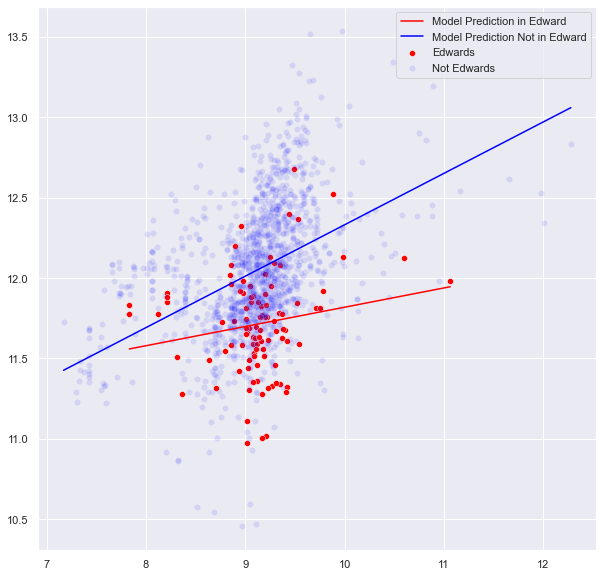

In [61]:
# Visualization code here
import seaborn as sns
sns.set(rc={"figure.figsize":(10, 10)})


to_pick = ["LotArea", "SalePrice"]

Edwards = data.loc[data["Neighborhood_Edwards"] == 1][to_pick]
Not_Edwards = data.loc[data["Neighborhood_Edwards"] == 0][to_pick]

model_edward = LinearRegression()
model_not_edward = LinearRegression()

X1 = np.reshape(np.log(np.array(Edwards["LotArea"])),(-1,1))
X2 = np.reshape(np.log(np.array(Not_Edwards["LotArea"])),(-1,1))

Y1 = np.log(Edwards["SalePrice"])
Y2 = Y = np.log(Not_Edwards["SalePrice"])

model_edward.fit(X1, Y1)
model_not_edward.fit(X2, Y2)

prediction_edward = model_edward.predict(X1)
prediction_not_edward = model_not_edward.predict(X2)

sns.scatterplot(x = np.log(np.array(Edwards["LotArea"])), 
                y = np.array(Y1), color = "red", label = "Edwards")

sns.scatterplot(x = np.log(np.array(Not_Edwards["LotArea"])), 
                y = np.array(Y2), color = "blue", label = "Not Edwards",
               alpha = 0.1);

sns.lineplot(x = np.log(np.array(Edwards["LotArea"])),
             y = prediction_edward, color = "red", 
             label = "Model Prediction in Edward")

sns.lineplot(x = np.log(np.array(Not_Edwards["LotArea"])),
             y = prediction_not_edward, color = "blue", 
             label = "Model Prediction Not in Edward");


## Build a final model with interactions

Use 10-fold cross-validation to build a model using the above interaction. 

In [63]:
# code here

Y =  data["SalePrice"]
X = data.drop("SalePrice", axis = 1)

X["interaction"] = X["Neighborhood_Edwards"] * X["LotArea"]



kfold = KFold(n_splits=10, shuffle=True, random_state=1)

baseline_final = np.mean(cross_val_score(regression, X, Y, scoring='r2', cv=kfold))

baseline_final

0.8093314939294032

Our $R^2$ has increased considerably! Let's have a look in `statsmodels` to see if this interactions are significant.

In [65]:
# code here
import statsmodels.api as sm

X_added = sm.add_constant(X)
model = sm.OLS(Y,X_added)
results = model.fit()

print(results.summary())


                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     148.6
Date:                Sat, 29 Jan 2022   Prob (F-statistic):               0.00
Time:                        02:21:35   Log-Likelihood:                -17229.
No. Observations:                1460   AIC:                         3.456e+04
Df Residuals:                    1411   BIC:                         3.482e+04
Df Model:                          48                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 2.082e+04 

What is your conclusion here?

In [ ]:
# formulate your conclusion

## Summary

You should now understand how to include interaction effects in your model! As you can see, interactions can have a strong impact on linear regression models, and they should always be considered when you are constructing your models.